In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
#sns.set_style('whitegrid

In [3]:
df=pd.read_csv("heart_disease.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# * Checking for messing values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# just find correlation of feature vs target using corrwith

In [10]:
df.drop('target',axis=1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

# Visualize the correlation

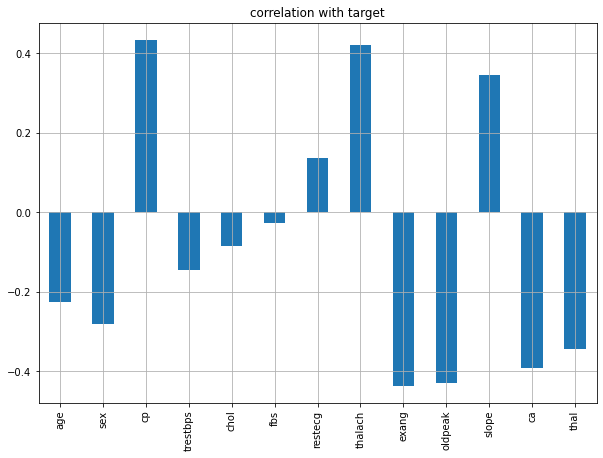

In [11]:
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,7),title='correlation with target')
plt.show()

# let's work on feature selection and see if that can help us buliding better model

# Model buliding using selectionpercewntile feature

In [12]:
from sklearn.feature_selection import SelectPercentile,chi2

In [13]:
# instantiate selectperctile and fit (feature label)
x=df.drop(['target'],axis=1)
y=df.target

SPercentile=SelectPercentile(score_func=chi2,percentile=80)
SPercentile=SPercentile.fit(x,y)

In [14]:
# seperate the feature to check p-value

cols=SPercentile.get_support(indices=True)
print("feature index=",cols)

# to return index number insted of boolen

features=x.columns[cols]
print('feature=',list(features))

feature index= [ 0  1  2  3  4  7  8  9 10 11]
feature= ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [17]:
df_score=pd.DataFrame({'features':x.columns,'chi2score': SPercentile.scores_,'pvalue':SPercentile.pvalues_})
df_score.sort_values(by='chi2score',ascending=False)

,features,chi2score,pvalue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


# ^ let's print the top 80% feature

# create subset of slected feature

In [18]:
x=df[features]
y=df.target

In [20]:
# Import libs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=42)

# * Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score

In [23]:
# write one function and cell as many as time to check accuracy_score of differt models

def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=clf.predict(x_test)
        print("=================Test Score======================")
        print("Accuracy Score===>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report==>",classification_report(y_test,pred,digits=2))


In [24]:
# Initiate GradientBoostingClassifier
gbdt_clf = GradientBoostingClassifier()

# train the model
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [26]:
# call the function and pass dataset check train and test_score
metrics_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   100.0
=================Test Score======================
Accuracy Score===>   83.51648351648352
Classification Report==>               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



# let's try if we can improve the performance of our model usuing parameter tuning

# * Hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid_param={
    'max_depth': range (4,8),
    'min_samples_split': range (2,8,2),
    'learning_rate': np.arange(0.1,0.3)
}

In [29]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [31]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}

In [33]:
gbdt_clf=GradientBoostingClassifier(max_depth=8,min_samples_split=2,learning_rate=0.1)

gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=8)

In [34]:
metrics_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   100.0
=================Test Score======================
Accuracy Score===>   71.42857142857143
Classification Report==>               precision    recall  f1-score   support

           0       0.68      0.68      0.68        41
           1       0.74      0.74      0.74        50

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91



# ** YOU can still tune the parameter with differnt range and try to improve the score

# **** XGBOOST

In [35]:
# new algorithm

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split,GridSearchCV

In [43]:
from sklearn.metrics import r2_score,mean_squared_error


In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jatin jaiss\\AppData\\Local\\Temp\\pip-install-7g9rtltt\\xgboost_315bc9a4738d49c7a30b87bc7db5c942\\setup.py'"'"'; __file__='"'"'C:\\Users\\jatin jaiss\\AppData\\Local\\Temp\\pip-install-7g9rtltt\\xgboost_315bc9a4738d49c7a30b87bc7db5c942\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\jatin jaiss\AppData\Local\Temp\pip-wheel-q3nq2afi'
       cwd: C:\Users\jatin jaiss\AppData\Local\Temp\pip-install-7g9rtltt\xgboost_315bc9a4738d49c7a30b87bc7db5c942\
  Complete output (852 lines):
  C:\ProgramData\Anaconda3\lib\site-packages\setuptools\dist.py:757: UserWarning: Usage o


  Running setup.py clean for xgboost
Failed to build xgboost
    Running setup.py install for xgboost: started
    Running setup.py install for xgboost: finished with status 'error'



  copying xgboost\dmlc-core\include\dmlc\common.h -> build\lib.win32-3.9\xgboost\dmlc-core\include\dmlc
  copying xgboost\dmlc-core\include\dmlc\concurrency.h -> build\lib.win32-3.9\xgboost\dmlc-core\include\dmlc
  copying xgboost\dmlc-core\include\dmlc\concurrentqueue.h -> build\lib.win32-3.9\xgboost\dmlc-core\include\dmlc
  copying xgboost\dmlc-core\include\dmlc\config.h -> build\lib.win32-3.9\xgboost\dmlc-core\include\dmlc
  copying xgboost\dmlc-core\include\dmlc\data.h -> build\lib.win32-3.9\xgboost\dmlc-core\include\dmlc
  copying xgboost\dmlc-core\include\dmlc\endian.h -> build\lib.win32-3.9\xgboost\dmlc-core\include\dmlc
  copying xgboost\dmlc-core\include\dmlc\filesystem.h -> build\lib.win32-3.9\xgboost\dmlc-core\include\dmlc
  copying xgboost\dmlc-core\include\dmlc\input_split_shuffle.h -> build\lib.win32-3.9\xgboost\dmlc-core\include\dmlc
  copying xgboost\dmlc-core\include\dmlc\io.h -> build\lib.win32-3.9\xgboost\dmlc-core\include\dmlc
  copying xgboost\dmlc-core\include\dm